    2. Take grayscale image of size 512x512 and perform the following operations –
    (a) Perform the brightness enhancement of a specific range of gray levels and observe its result
    (b) Differentiate the results of power law transform and inverse logarithmic transform
    (c) Find the difference image between original and the image obtained by last three bits (MSB)  

## 2a. Gray Level Slicing / Brightness Enhancement

In [271]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/2A_GrayLevelSlicing.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [272]:
# Specific Range of Gray Level Enhancement
# Specific Range of Gray Level Enhancement
gl_slice_img = img.copy()
mask_1 = (gl_slice_img > 0) & (gl_slice_img < 75)
gl_slice_img[mask_1] = 50

mask_2 = (gl_slice_img > 100)
gl_slice_img[mask_2] = 200


In [273]:
# # Histogram using built-in function
# plt.figure(figsize=(15,15))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap='gray')
# plt.title("Original Image")

# plt.subplot(2,2,2)
# plt.hist(img.ravel(), bins=256, range=[0,256])

# plt.subplot(2,2,3)
# plt.imshow(gl_slice_img,cmap='gray')
# plt.title("Enhanced Image")

# plt.subplot(2,2,4)
# plt.hist(gl_slice_img.ravel(), bins=256, range=[0,256])

# plt.show()


### Histogram using custom function

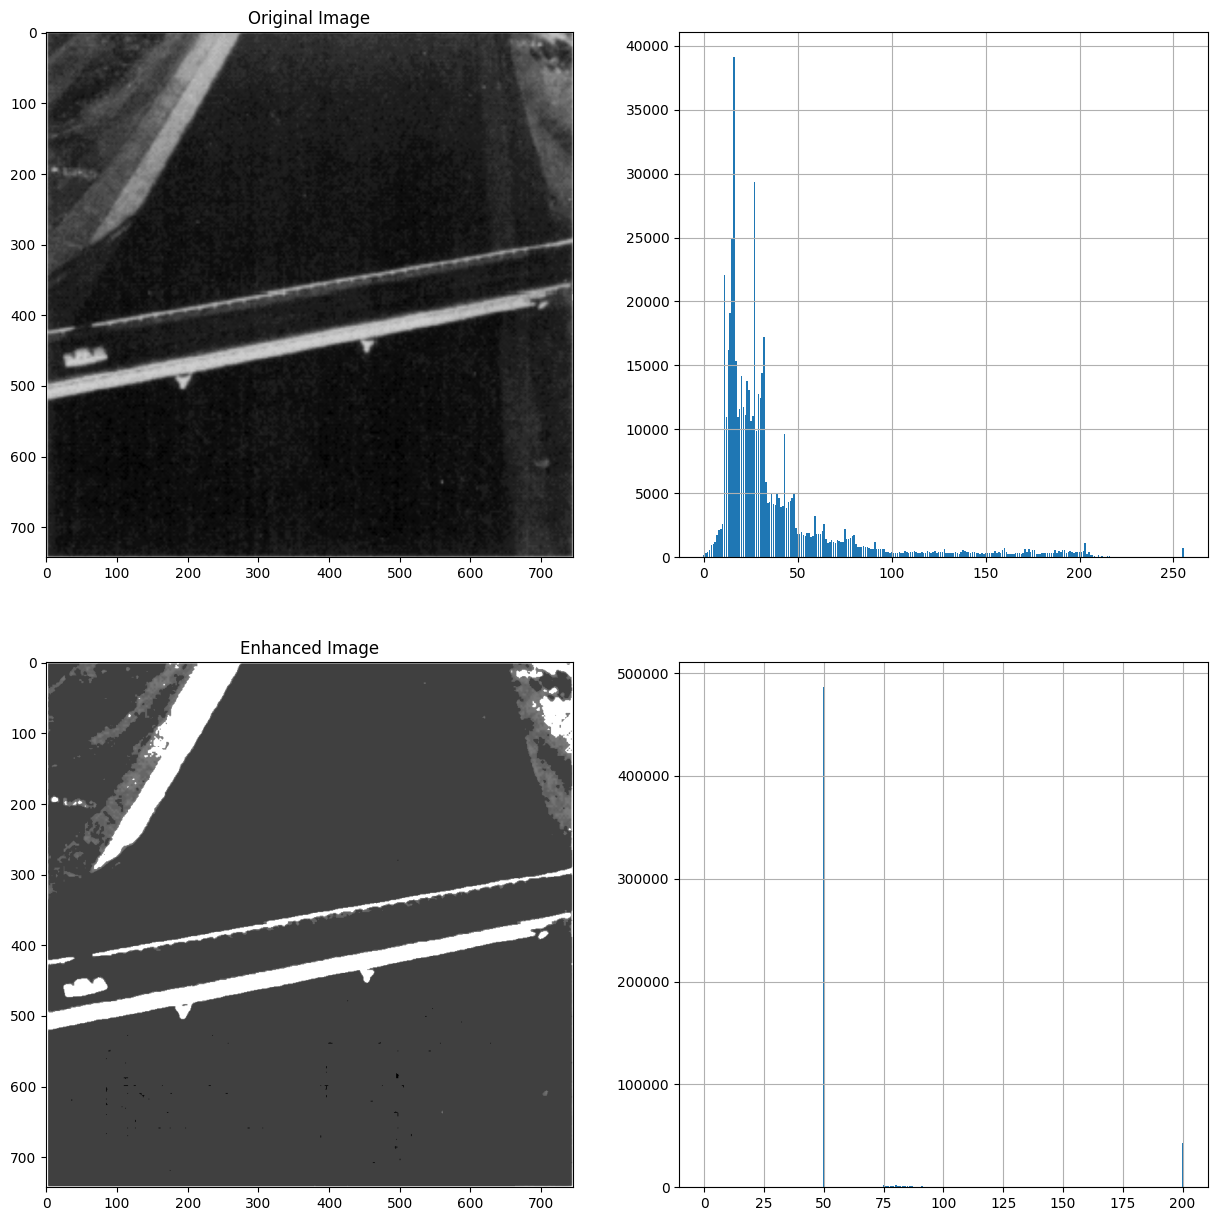

<Figure size 640x480 with 0 Axes>

In [274]:
def show_histogram(imgg):
    occurance = {}

    for row in imgg:
        for value in row:
            if value in occurance:
                occurance[value]+=1
            else:
                occurance[value]=1

    occurance = dict(sorted(occurance.items()))
    plt.bar(occurance.keys(),occurance.values())
    plt.grid(True)
    return occurance

#Show
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")

plt.subplot(2,2,2)
show_histogram(img)

plt.subplot(2,2,3)
plt.imshow(gl_slice_img,cmap='gray')
plt.title("Enhanced Image")

plt.subplot(2,2,4)
show_histogram(gl_slice_img)

plt.show()
plt.savefig("Images/graylevelsliced_output.png")

# 2b. Powerlaw vs Inverse Logarithmic Transform

### Powerlaw Transform

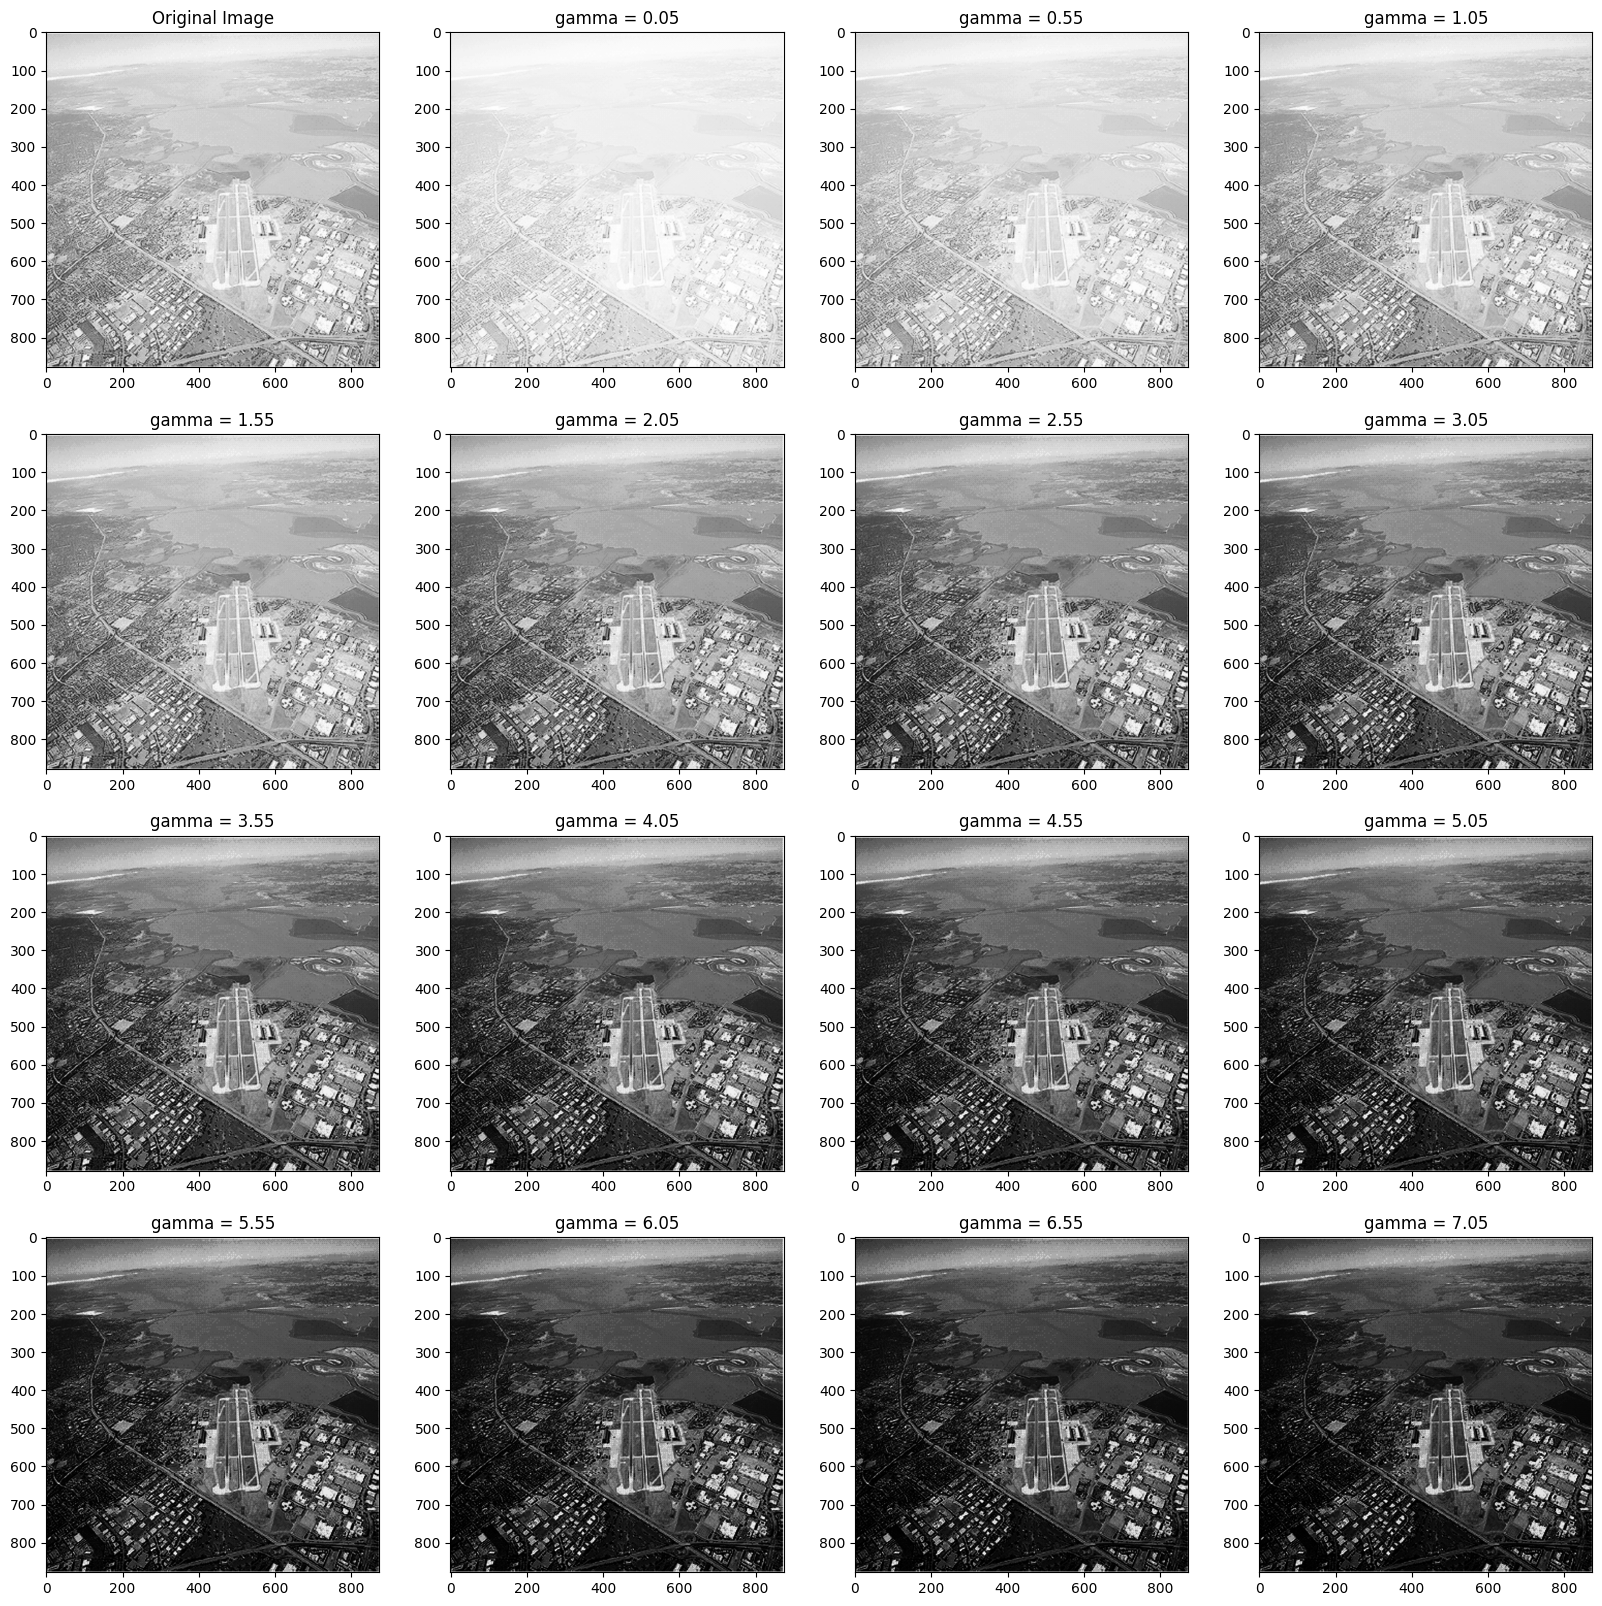

In [275]:
powerlaw_img = cv2.imread("Images/Powerlaw.png")
powerlaw_img = cv2.cvtColor(powerlaw_img,cv2.COLOR_BGR2GRAY)

gamma = 0.05
c = 1

plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
plt.imshow(powerlaw_img,cmap='gray')
plt.title("Original Image")


for i in range(2,17):
    plt.subplot(4,4,i)
    new_img = c*powerlaw_img**gamma
    plt.imshow(new_img,cmap='gray')
    plt.title(f"gamma = {round(gamma,2)}")
    gamma+=0.5

plt.savefig("Images/powerlaw_output_img.png")




Powerlaw makes whiter image, more whiter when gamma <1
else, makes it darker

### Inverse Logarithmic Transform

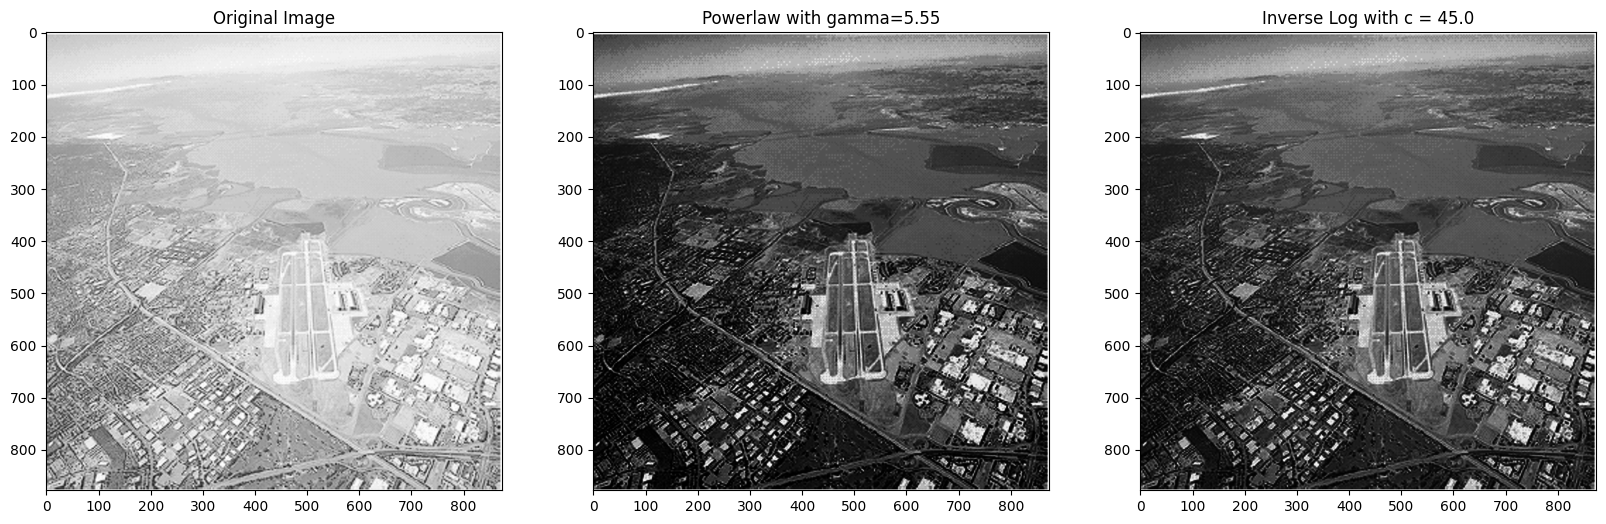

In [276]:
# s = e to the power [ c*log(1+r) ]

inv_log_img = cv2.imread("Images/Powerlaw.png")
inv_log_img = cv2.cvtColor(inv_log_img,cv2.COLOR_BGR2GRAY)


c = 255//(np.log(1+np.max(inv_log_img))) # Masum Formula

plt.figure(figsize=(20,20))

# Original Image
plt.subplot(1,3,1)
plt.imshow(inv_log_img,cmap='gray')
plt.title("Original Image")

# Powerlaw Image
plt.subplot(1,3,2)
img = powerlaw_img**(5.55)
plt.imshow(img,cmap='gray')
plt.title("Powerlaw with gamma=5.55")

# Inverse Log Transform
plt.subplot(1,3,3)
img = np.exp(inv_log_img/c)-1
plt.imshow(img,cmap='gray')
plt.title(f"Inverse Log with c = {c}")


plt.savefig("Images/powerlaw_vs_invlog_img.png")


# 2c. Bit Plance Slicing (Obtained by last MSB 3 Bit)

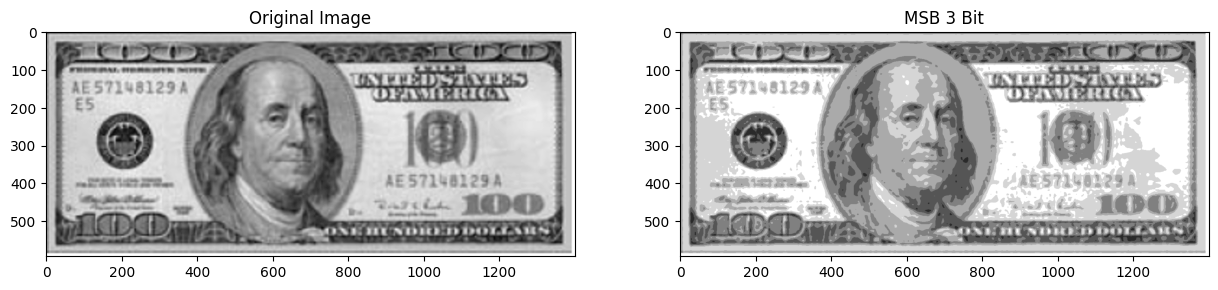

In [291]:
MSB_img = cv2.imread("Images/BitPlanceSlice_Dollar.png")
MSB_img = cv2.cvtColor(MSB_img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
# Original Image
plt.subplot(1,2,1)
plt.imshow(MSB_img,cmap='gray')
plt.title("Original Image")

# MSB 3 Bit
plt.subplot(1,2,2)
new_img = np.bitwise_and(MSB_img,0b11100000)
plt.imshow(new_img,cmap='gray')
plt.title("MSB 3 Bit")

plt.savefig("Images/MSB_3_bit_2c_Output.png")
